<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/%EA%B3%A0%EA%B0%9D%EC%84%B8%EB%B6%84%ED%99%94_%EC%B1%85%ED%8C%90%EB%A7%A4_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


In [2]:
# loading sample data
cs1 = pd.read_csv('cust_seg_smpl_280122.csv', encoding='CP949')

# 유니코드 디코드 에러, UnicodeDecodeError: 'utf-8' codec can't decode byte
# 에러 발생을 피하기 위해encoding 옵션 지정

print(cs1.columns)
cs1.head()

Index(['고객명', '성별', '연령', '지역', '구매일수', '최종구매후기간', '구매서적수', '서적구매액', '기타상품구매액',
       '총구매액', '관심쟝르', '구매쟝르수', '가입기간', 'SMS수신여부'],
      dtype='object')


,고객명,성별,연령,지역,구매일수,최종구매후기간,구매서적수,서적구매액,기타상품구매액,총구매액,관심쟝르,구매쟝르수,가입기간,SMS수신여부
0,한지민,여,17,부산,5,2,8,"96,000","38,400","134,400",소설,2,12,수신
1,장이성,남,19,서울,2,2,3,"36,000","14,400","50,400",과학,1,24,수신
2,이수문,남,21,서울,20,1,22,"286,000","214,500","500,500",소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,"60,000","24,000","84,000",시,1,16,수신
4,염시훈,남,26,서울,3,5,4,"160,000","64,000","224,000",소설,3,9,수신


In [3]:
# 한글로된 컬럼명이 싫어서 -- 인코딩으로 발생될 수 있는 만의 하나의 문제를 회피
cs1.columns = ["cust_name", "sex", "age", "location", "days_purchase",
   "recency", "num_books", "amt_books", "amt_non_book",
   "amt_total", "interest_genre", "num_genre",
   "membership_period", "sms_optin"]
cs1.head()

,cust_name,sex,age,location,days_purchase,recency,num_books,amt_books,amt_non_book,amt_total,interest_genre,num_genre,membership_period,sms_optin
0,한지민,여,17,부산,5,2,8,"96,000","38,400","134,400",소설,2,12,수신
1,장이성,남,19,서울,2,2,3,"36,000","14,400","50,400",과학,1,24,수신
2,이수문,남,21,서울,20,1,22,"286,000","214,500","500,500",소설,4,15,NaN
3,오진호,남,25,인천,4,3,5,"60,000","24,000","84,000",시,1,16,수신
4,염시훈,남,26,서울,3,5,4,"160,000","64,000","224,000",소설,3,9,수신


findfont: Font family ['HYkanM'] not found. Falling back to DejaVu Sans.


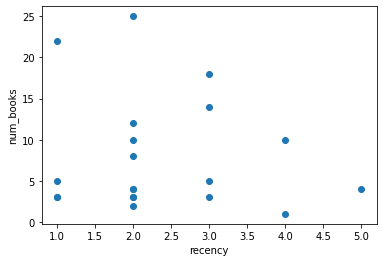

findfont: Font family ['HYkanM'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.p

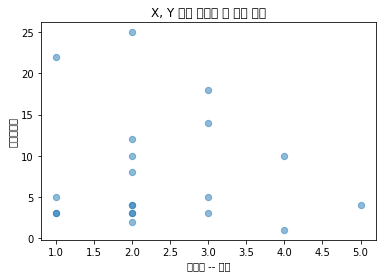

In [7]:
# 최종구매후기간 recency와 구매한 서적의 수 사이의 관계 확인

# 한글 폰트 표시 지정
import matplotlib.font_manager as fm

# 폰트 위치와 이름 지정
#font_location = 'HYKANM.ttf'  
font_name = fm.FontProperties(fname = 'HYKANM.TTF').get_name()
# matplotlib 설정
plt.rc('font', family = font_name)

plt.scatter(cs1['recency'], cs1['num_books'])
plt.xlabel('recency')
plt.ylabel('num_books')
plt.show()

plt.scatter(cs1['recency'], cs1['num_books'], s=40, alpha=0.5)
plt.title('X, Y 축에 한글로 축 이름 표시')
plt.xlabel('최근성 -- 역순')
plt.ylabel('구매서적수')
plt.show()

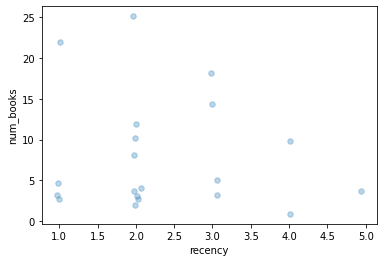

In [8]:
# 동일 좌표에 다수의 고객 존재 가능성이 있으므로 jitter 사용자 정의 함수를 활용

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')
plt.show()

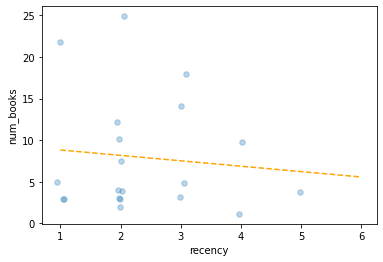

In [9]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['recency']
y = cs1['num_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 1

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(7)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음

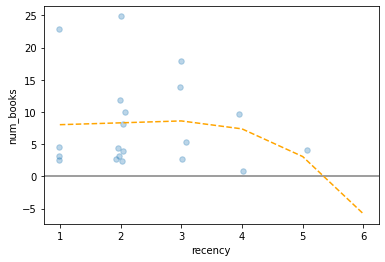

In [10]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['recency']
y = cs1['num_books']
# 회귀함수의 차수 지정
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(7)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['recency']), rjitt(cs1['num_books']),
           s=30, alpha=0.3)
plt.xlabel('recency')
plt.ylabel('num_books')
plt.axhline(0, color='grey')
plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 구매서적의 수가 음수가 되는 것은 허용되지 않는 값임

In [ ]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['num_books']
y = cs1['amt_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 1

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['amt_books']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('amt_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음

In [ ]:
# add regression line
# abline(lm(cs1$num_books~cs1$recency), col="blue")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = cs1['num_books']
y = cs1['amt_books']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['amt_books']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('amt_books')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 보조선인 회귀선을 본다면 최근성이 낮을수록, 즉 구매한지 오래되었을 수록
# 구매한 서적의 수가 많음. 단, 구매수량이 증가한다고 
# 금액이 무한정 증가하는지는 확실하지 않음

In [ ]:
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']


x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
           s=30, alpha=0.3)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남

In [ ]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']


x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
           s=30, alpha=0.3, color=colors1)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')
# 0에서 부터 출발하도록 Y축의 구간을 변경
# 변동이 크게 보이는 착시를 완화
# 표시할 값 중 최대의 105% 까지로 자동 설정 
plt.ylim(0,cs1['unitprice_book'].max()*1.05)
plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남
# 여성의 경우 구매금액이 매우 큰 경우가 없었음

In [ ]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

cs1['unitprice_book'] = cs1['amt_books'] / cs1['num_books']


x = cs1['num_books']
y = cs1['unitprice_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['num_books']), rjitt(cs1['unitprice_book']),
            s=100*cs1['amt_non_book']/cs1['amt_non_book'].max(), 
            alpha=0.3, color=colors1)
plt.xlabel('num_books')
plt.ylabel('unitprice_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(12,35000, '* Size: volume index of amt_none_book')
# text 함수를 사용해서 주석 달아주기
plt.axhline(cs1['unitprice_book'].median(), color='darkgrey')
plt.show()

# 구매수량이 일정 지점을 지나서는 평균단가가 조금 줄어드는 경향 나타남
# 여성의 경우 구매금액이 매우 큰 경우가 없었음

In [ ]:
colors1 = ['red' if x=='여' else 'blue' for x in cs1['sex']]
# 주로 비싼 책을 샀는지를 파악하기 위해 평균금액을 계산

x = cs1['amt_books']
y = cs1['amt_non_book']
# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(x).reshape(-1, 1), y)
x_reg = np.arange(25)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(rjitt(cs1['amt_books']), rjitt(cs1['amt_non_book']),
            alpha=0.3, color=colors1)
plt.xlabel('amt_books')
plt.ylabel('amt_non_book')

plt.plot(x_reg, y_reg, color='orange', linestyle='--')
plt.text(250000,15000, 'cross-sell target')
# text 함수를 사용해서 주석 달아주기
plt.axvline(cs1['amt_books'].quantile(0.7), color='darkgrey', linestyle='--')
plt.axhline(cs1['amt_non_book'].quantile(0.8), color='darkgrey', linestyle='--')
plt.show()

# 책을 많이 사는 편인데 책쪽만 집중된 경우를 기타 상품군에 대한
# 교차판매용 대상으로
# == 서적 구매는 많으나 기타 상품 구매가 약한 집단을 선정해
# 집중적 cross-selling 노력 기울이는 방안?

In [ ]:
# 성별 인원수 확인
cs1['sex'].value_counts().reset_index()
index	sex
0	남	14
1	여	6


In [ ]:
# 성별 인원수 확인 -- 건수 대신 구성비 산출
# 참고 :: https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba 

# reset_index() 명령으로 pandas dataframe으로 변환
# sort_values()로 정렬
cs1['sex'].value_counts(normalize=True).reset_index().sort_values(by='sex', ascending=False)

In [ ]:
# 시각적으로 설정했던 기준선 (=교차판매 대상 집단 조건) 영역에 해당하는 고객리스트 추출

tgtgridseg = cs1[(cs1['amt_books'] > cs1['amt_books'].quantile(0.7)) & 
                 (cs1['amt_non_book'] < cs1['amt_non_book'].quantile(0.8)) ]

print('number of cross-sell target customers : ', len(tgtgridseg),'\n')

print("size of target = ", 100* len(tgtgridseg)/ cs1.shape[0], " % of customer base")

In [ ]:
# 선정된 집단의 프로파일 시각적으로 확인

# 서적 구매수량과 성별 분포 확인 (여성은 pink)

colors2 = ['pink' if x=='여' else'lightblue' for x in tgtgridseg['sex']]
plt.bar(tgtgridseg['cust_name'], tgtgridseg['num_books'], 
        color=colors2)
plt.ylabel("num_books")

# 전체고객의 평균/중위수 서적구매수량과 비교

plt.axhline(cs1['num_books'].mean(), linestyle='--')
# font in grey color
plt.text(1,cs1['num_books'].mean()+1, 'mean of the entire cust base', color='grey')
plt.axhline(cs1['num_books'].median(), linestyle='--')
plt.text(1,cs1['num_books'].median()+1, 'median of the entire cust base')
plt.title('profile of cross-sell target segment')
plt.show()

# 전체 집단에 비해서는 서적 구매수량이 많은 집단
# 전체 집단에 비해서는 여성 비율이 조금은 더 높은 집단 (i.e. 0.33 > 0.3)    

# 기타 상품 중 여성 선호 상품을 찾아 제안하는 방식으로 cross-sell
# 테스트 캠페인 시도 가능할 것

In [ ]:
# 군집분석을 활용한 고객세분화

# 수치형식의 중요 변수를 클러스터링에 사용하기 위해 지정 
vars4clst = [ "days_purchase", "recency", "num_books",
             "amt_books", "amt_non_book", "amt_total", "num_genre", "membership_period" ] 

cs2 = cs1[vars4clst]

# 선정된 변수들의 데이터 타입 확인
print(cs2.dtypes)

cs2.head()

In [ ]:
from sklearn.cluster import KMeans  

# df 자체를 할당하는 대신 복제를 생성
df4kmm = cs2.copy()

# 타입변경은 사실 unnecessary 이미 수치형이라
X = np.array(df4kmm.astype(int))

# create k-means model
kmm1 = KMeans(n_clusters=3, random_state=111)  
# set seed using random_state option
kmm1.fit(X)  

# kmeans.cluster_centers_  

# 군집별 고객수 분포 확인
clst_label, clst_cust_counts = np.unique(kmm1.labels_, return_counts=True)

# 고객집단을 표시할 색상을 임의로 지정
# 번호순의 색상 이름 벡터 생성
colors3 = ['brown','khaki','silver']

plt.bar(clst_label, clst_cust_counts, color=colors3) 
plt.title('number of cutomer by cluster')
plt.show()

# 테이블 형태로 화면 출력하기 위해 임시 테이블 생성
pd.DataFrame({'clst': clst_label, 'cust_count': clst_cust_counts})

In [ ]:
# 각 고객의 소속 집단이 어디인가에 따라 색상 표시
colors4 = [colors3[x] for x in  kmm1.labels_] 

plt.scatter(rjitt(cs1['days_purchase']), rjitt(cs1['num_genre']),
   color = colors4, s=50, alpha=0.4)

# subtitle 다는 기능이 직접적으로는 없음. 따라서 우회적 방법 활용
plt.suptitle("Cust Segment Profile: Frequency X Book Genre Diversity")
# title 대신 suptitle을 title 용도로 활용하고
subtitle_text = 'Clusters : ' + str(colors3)
# subtitle 용도로 title을 활용하면서 폰트를 작게
plt.title(subtitle_text, fontsize=9, color='darkgrey')
plt.xlabel('Frequency')
plt.ylabel('Book Genre Diversity')
plt.show()

In [ ]:
# 군집 프로파일링 - 약식의 일괄 처리
cs3 = cs2.copy()
cs3['clst'] = kmm1.labels_
cs3.groupby('clst').mean().reset_index().sort_values('amt_total', ascending=False).round(1)